In [78]:
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

In [20]:
df = pd.read_csv('data/kandidater_data.csv').dropna()

In [21]:
df

,ID,Firstname,LastName,Gender,Birthdate,CurrentPartyCode,Profession,Education,1,2,...,16,17,18,19,20,21,22,23,24,25
0,391,Anne Valentina,Berthelsen,F,1994-09-16,F,Folketingsmedlem,Bachelor-/diplomuddannelse,2.0,2.0,...,2.0,-1.0,1.0,1.0,-1.0,-2.0,2.0,2.0,1.0,2.0
1,756,Mattias,Tesfaye,M,1981-03-31,A,Minister,Erhvervsuddannelse,1.0,1.0,...,-2.0,1.0,-1.0,1.0,2.0,-2.0,1.0,1.0,1.0,1.0
2,235,Kashif,Ahmad,M,1980-06-01,B,Ikke oplyst,Ikke oplyst,1.0,-1.0,...,1.0,-2.0,1.0,-2.0,-2.0,1.0,2.0,2.0,2.0,2.0
3,931,Ester,Esmarch,F,1974-12-31,K,Offentligt ansat,Bachelor-/diplomuddannelse,1.0,1.0,...,-1.0,-2.0,-1.0,1.0,-2.0,1.0,1.0,1.0,-1.0,1.0
5,386,Peter,Westermann,M,1985-06-01,F,Byråds- eller regionsrådsmedlem,Kandidat-/masteruddannelse,1.0,1.0,...,1.0,-1.0,1.0,1.0,-2.0,-2.0,2.0,2.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
987,203,Andreas,Steenberg,M,1983-07-22,B,Folketingsmedlem,Kandidat-/masteruddannelse,1.0,-2.0,...,1.0,-2.0,1.0,-1.0,-2.0,-1.0,-1.0,1.0,1.0,-1.0
988,934,Jonas Røjkjær,Laustsen,M,2000-12-25,K,Studerende,Gymnasial uddannelse,-1.0,-1.0,...,-2.0,-2.0,1.0,-1.0,-2.0,1.0,1.0,1.0,1.0,2.0
990,118,Tobias,Bennedsen,M,1986-04-14,C,Offentligt ansat,Bachelor-/diplomuddannelse,-2.0,-2.0,...,-2.0,-1.0,-1.0,-1.0,2.0,2.0,1.0,1.0,1.0,-2.0
993,294,Sandra Elisabeth,Skalvig,F,1990-10-09,I,Offentligt ansat,Bachelor-/diplomuddannelse,-1.0,-2.0,...,-2.0,-1.0,-2.0,-2.0,2.0,2.0,-1.0,-1.0,1.0,-1.0


In [46]:
X = df[[str(i) for i in range(1, 26)]]
labels = df.CurrentPartyCode

In [58]:
colormap = {'A': '#A82721', 
            'O': '#EAC73E', 
            'V': '#254264', 
            'Ø': '#E6801A', 
            'I': '#3FB2BE', 
            'Å': '#2B8738', 
            'B': '#733280', 
            'F': '#E07EA8', 
            'C': '#96B226', 
            'D': '#127B7F', 
            'K': '#8B8474', 
            'Q': '#C49414', 
            'M': '#832B93', 
            'Æ': '#2C5877'}

In [59]:
c = labels.map(colormap)

In [60]:
c

0      #E07EA8
1      #A82721
2      #733280
3      #8B8474
5      #E07EA8
        ...   
987    #733280
988    #8B8474
990    #96B226
993    #3FB2BE
995    #733280
Name: CurrentPartyCode, Length: 792, dtype: object

In [69]:
pca = PCA(n_components=1)
xt = pca.fit_transform(X)

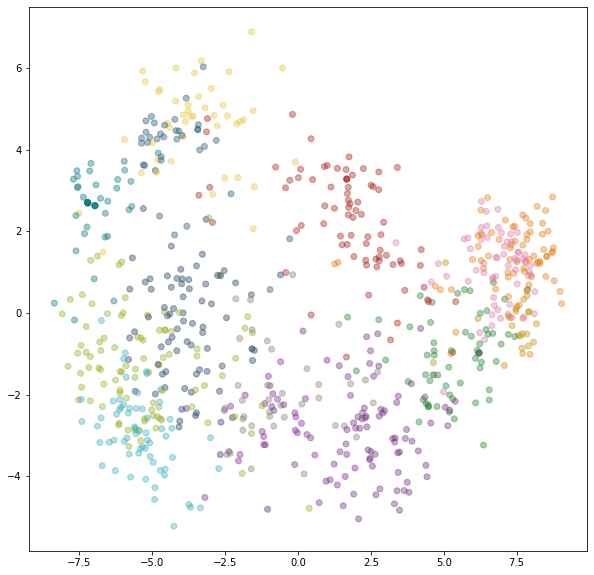

In [68]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(xt[:,0], xt[:,1], color=c, alpha=.4)

In [88]:
y = np.random.randn(df.shape[0])

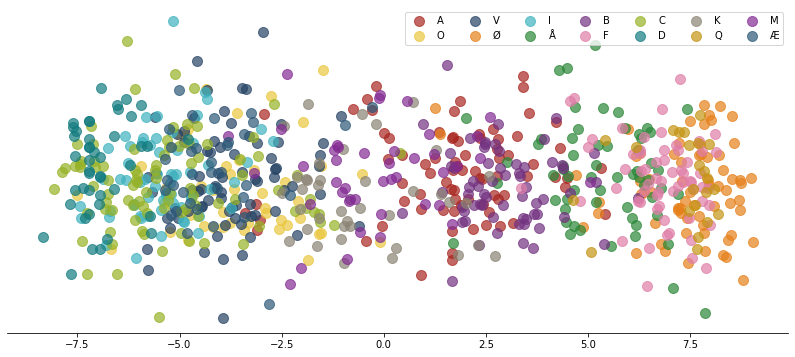

In [121]:
fig, ax = plt.subplots(figsize=(14, 6))
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_yticks([])

for key, val in colormap.items():
    mask = df.CurrentPartyCode == key
    ax.scatter(xt[mask,0], y[mask], color=val, alpha=.7, s=100, label=key)
ax.legend(ncol=7)